# LAB 02 Assigment

Dominik Breksa (dominikbreksa@student.agh.edu.pl)

### Imports and setup of libraries and packages

In [1]:
import pint
import scipy
import numpy as np
import open_atmos_jupyter_utils
from matplotlib import pyplot

In [2]:
si = pint.UnitRegistry()
si.setup_matplotlib()
si

### Narrative explaining of the mathematical model

Our mathematical model can be described by the following equation:

$$
\frac{\partial c}{\partial t} + U \frac{\partial c}{\partial x} - D \frac{\partial^2 c}{\partial^2 x} = 0
$$

One possible interpretation of this model is the concentration of solute in a steady moving laminar stream of liquid also called a "Poiseuille flow" with Advection and molecular Diffusion effects. We have a one-dimensional tube in which we experience a laminar flow of a liquid (Solvent) of some constant speed. We add the solvent to a solute of some mass which is influenced by diffusion. Then we set a measurement point in the constant distance from the point of adding the solute and observe the concentration of the solute in relation to time.

### The type of solution

$$
c(x, t) = \frac{M}{A}\frac{1}{2\sqrt{\pi D}}\frac{x}{t^\frac{3}{2}}e^{\Bigg( -\frac{(ut - x)^2}{4Dt} \Bigg)}
$$

Previously shown differential equation has the analytical solution (the equation above) for the following initial and boundary conditions:

- $\frac{\partial c(x, t)}{\partial x} = 0$ — this is satisfied at the edge of the cylinder in which the Poiseuille flow is present (i.e. the impermeable boundary assumption).

### Units and symbols in $c(x, t) [\frac{kg}{m^3}]$

- $x$ — the measure of length in meters $[m]$,

- $t$ — time in seconds $[s]$. Deducted from the X axis on the assigment plot,

- $c(x, t)$ — concentration of solute in kilograms times cubic meters $[\frac{kg}{m^3}]$,

- $D$ — diffusion coefficient in meters squared divided by seconds $[\frac{m^2}{s}]$,

- $u$ — the speed of the laminar flow in meters per second $[\frac{m}{s}]$,

- $M$ — mass of the solute in kilograms $[kg]$,

- $A$ — volumetric flow rate (cross-sectional area ($A_c$) times velocity of a liqud flow ($u$) ($=> A=A_cu$)) in meters cubed per second $[\frac{m^3}{s}]$.


### Lecture slide analysis

Additional notes:

- Since the main task of the assignment has been to mimic exactly the plot $c(x, t) [kgm^3]$ shown on the slide (i.e. match the units on the axes etc.), the $A$ symbol from the $c(x, t)$ equation must have a different unit than stated above. New $A$ unit is the inverse of cubic meters times the inverse of a second $[\frac{1}{m^3s}]$.

After the analysis of the formula $c(x, t) [kgm^3]$ plotted on the lecture slide, we can deduce that:

- The $x [m]$ is constant meaning the measurement point is not moving in time, because OX axis is only dependent on time $[s]$,

- The single global maximum in the plotted curve is equal around to $0.04 [kgm^3]$,

- The global maximum of a function is present at a time of around $t=50s$,

- The curve is not symmetrical if we use the global maximum time as an axial symetry (comparing the left and right side of a global maxima),

- No matter the time $[s]$ and $x [m]$ chosen in the model the area under the curve from $-\infty$ to $\infty$ is always the same and should be proportional (equal) to the mass $M [kg]$ of solute in the system.

### Choice of parameters and their units

Additional notes:

- The names of the variables are uppercase so that the IDE does not complain of the conflicting arguments names in a function declaration below,

- The value of $D$ is equal to the value of diffusion coefficient of $CO_2$ in water at temperature $T=293K$ (source: https://www.thermopedia.com/de/content/696/).

In [3]:
M = np.float64(4.655) * si.kg
A = np.float64(5) * si.m ** -3 / si.s
D = np.float64(0.0000192) * si.m ** 2 / si.s
U = np.float64(0.0047) * si.m / si.s

In [4]:
X = np.float64(0.25) * si.m
T = np.linspace(0.1, 100.1, 1000, dtype=np.float64) * si.s  # Cannot divide by zero, so the first element is 0.1

### Python Script implementing the analytic solution

In [5]:
from typing import Callable


def fill_c_function(m, a, d, u) -> Callable[[np.ndarray, np.ndarray], np.ndarray]:
    """Usage of functional programing technic to simplify parameter supply"""

    assert m.check(si.kg), f'{m.units=} is not provided as a measure of a mass({si.kg=})'
    assert a.check(si.m ** -3 / si.s), f'{a.units=} is not provided as a measure in dimensions {si.m ** -3 / si.s=}'
    assert d.check(si.m ** 2 / si.s), f'{d.units=} is not provided as a measure of a diffusion coefficient({si.m ** 2 / si.s=})'
    assert u.check(si.m / si.s), f'{u.units=} is not provided as a measure of a velocity({si.m / si.s=})'

    def c(x: np.ndarray, t: np.ndarray) -> np.ndarray:
        assert x.check(si.m), f'{x.units=} is not provided as a measure of a length({si.m=}) dimension'
        assert t.check(si.s), f'{t.units=} is not provided as a measure of a time({si.s=}) dimension'

        nonlocal m
        nonlocal a
        nonlocal d
        nonlocal u

        return (m * x * np.exp((-(u * t - x) ** 2) / (4 * d * t))) / (2 * a * (np.pi * d) ** 0.5 * t ** 1.5)

    return c

def fill_c_with_x(c: Callable[[np.ndarray, np.ndarray], np.ndarray], x: np.ndarray) -> Callable[[np.ndarray], np.ndarray]:
    """Perform curring technic as above to make c(x, t) only dependent on time(t)"""

    def c_with_x(t: np.ndarray) -> np.ndarray:
        nonlocal x
        return c(x, t)

    return c_with_x

Create a Python function object that matches the $c(x, t)$ definition from the beginning of the raport.

In [6]:
C = fill_c_function(M, A, D, U)
C_with_const_x = fill_c_with_x(C, X)

Compute the results.

In [7]:
C_result = C_with_const_x(T)

assert C_result.check(si.kg * si.m ** 3), f'The units must match with the units on the lecture plot. Got: \'{C_result.units=}\', expected: \'{si.kg * si.m ** 3=}\''

### Creating the plot with units automatically handled by pint

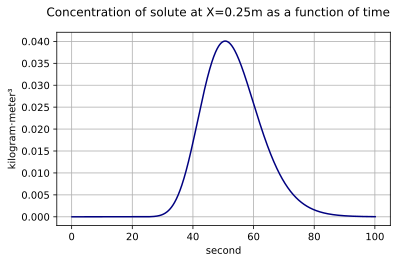

In [8]:
fig = pyplot.figure(figsize=(6, 3.5))
fig.gca().plot(T, C_result, color='navy')
fig.suptitle(f'Concentration of solute at X={X.magnitude}m as a function of time')
fig.gca().grid()
open_atmos_jupyter_utils.show_plot(fig=fig)